In [ ]:
# Check for GPU
!nvidia-smi -L

GPU 0: Tesla V100-SXM2-16GB (UUID: GPU-dda81db5-9e0e-67f4-7b28-433ed9dfa1f4)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers
import matplotlib.pyplot as plt

Import training and validation datasets

In [ ]:
# Import with pandas
import os
import pandas as pd


# Define directory where all CSV files are stored
dir_path = "/content/drive/MyDrive/Colab Notebooks/daily_datas/TSLA"

# Get a list of all the CSV filenames in the directory
all_files = [os.path.join(dir_path, filename) for filename in os.listdir(dir_path) if filename.endswith('.csv')]

# Read each file and append its content to a list of DataFrames
dfs = [pd.read_csv(file, parse_dates=["Date"], index_col=["Date"]) for file in all_files]

# Combine all the DataFrames into one
df = pd.concat(dfs, axis=0)

# Sort the DataFrame by its index (which is the date)
df = df.sort_index()

df = df[['Open','High','Low','Close','Adj Close']]

df.head(50)


,Open,High,Low,Close,Adj Close
Date,,,,,
2021-01-04,239.820007,248.163330,239.063339,243.256668,243.256668
2021-01-05,241.220001,246.946671,239.733337,245.036667,245.036667
2021-01-06,252.830002,258.000000,249.699997,251.993332,251.993332
2021-01-07,259.209991,272.329987,258.399994,272.013336,272.013336
2021-01-08,285.333344,294.829987,279.463318,293.339996,293.339996
2021-01-11,283.133331,284.809998,267.873322,270.396667,270.396667
2021-01-12,277.000000,289.333344,275.779999,283.146667,283.146667
2021-01-13,284.253326,286.823334,277.333344,284.803345,284.803345
2021-01-14,281.130005,287.666656,279.583344,281.666656,281.666656


Import testing (prediction) dataset

In [ ]:
# Import with pandas
import os
import pandas as pd

# Define directory where all CSV files are stored
dir_path2 = "/content/drive/MyDrive/Colab Notebooks/daily_datas/TSLA"

# Get a list of all the CSV filenames in the directory
all_files2 = [os.path.join(dir_path2, filename) for filename in os.listdir(dir_path2) if filename.endswith('.csv')]

# Read each file and append its content to a list of DataFrames
dfs2 = [pd.read_csv(file, parse_dates=["Date"], index_col=["Date"]) for file in all_files2]

# Combine all the DataFrames into one
df2 = pd.concat(dfs2, axis=0)

# Sort the DataFrame by its index (which is the date)
df2 = df2.sort_index()

df2 = df2[['Open','High','Low','Close','Adj Close']]

df2.tail(50)

,Open,High,Low,Close,Adj Close
Date,,,,,
2023-07-28,259.859985,267.250000,258.230011,266.440002,266.440002
2023-07-31,267.480011,269.079987,263.779999,267.429993,267.429993
2023-08-01,266.260010,266.470001,260.250000,261.070007,261.070007
2023-08-02,255.570007,259.519989,250.490005,254.110001,254.110001
2023-08-03,252.039993,260.489990,252.000000,259.320007,259.320007
2023-08-04,260.970001,264.769989,253.110001,253.860001,253.860001
2023-08-07,251.449997,253.649994,242.759995,251.449997,251.449997
2023-08-08,247.449997,250.919998,245.009995,249.699997,249.699997
2023-08-09,250.869995,251.100006,241.899994,242.190002,242.190002


Add one more row in test (predict) dataset for prediction purposes

In [ ]:
# Extract the last date in the index
last_date = df2.index[-1]

# Add one day to the date and set the time to 09:30:00-04:00
new_date = pd.Timestamp(last_date + pd.Timedelta(days=1)).replace(hour=0, minute=00)

# Append the new date to the DataFrame with NaN values for all columns
df2.loc[new_date] = [pd.NA] * len(df2.columns)

df2.tail(10)

,Open,High,Low,Close,Adj Close
Date,,,,,
2023-09-26,242.979996,249.550003,241.660004,244.119995,244.119995
2023-09-27,244.259995,245.330002,234.580002,240.500000,240.500000
2023-09-28,240.020004,247.550003,238.649994,246.380005,246.380005
2023-09-29,250.000000,254.770004,246.350006,250.220001,250.220001
2023-10-02,244.809998,254.279999,242.619995,251.600006,251.600006
2023-10-03,248.610001,250.020004,244.449997,246.529999,246.529999
2023-10-04,248.139999,261.859985,247.600006,261.160004,261.160004
2023-10-05,260.000000,263.600006,256.250000,260.049988,260.049988
2023-10-06,253.979996,261.649994,250.649994,260.529999,260.529999


Windowing multivariate dataset

In [ ]:
WINDOW_SIZE=21
HORIZON=7

In [ ]:
# Make a copy of the stock historical data
df_windowed = df.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  df_windowed[f"Open-{WINDOW_SIZE-i}"] = df_windowed["Open"].shift(periods=i+1)
  df_windowed[f"High-{WINDOW_SIZE-i}"] = df_windowed["High"].shift(periods=i+1)
  df_windowed[f"Low-{WINDOW_SIZE-i}"] = df_windowed["Low"].shift(periods=i+1)
  df_windowed[f"Close-{WINDOW_SIZE-i}"] = df_windowed["Close"].shift(periods=i+1)
  df_windowed[f"Adj Close-{WINDOW_SIZE-i}"] = df_windowed["Adj Close"].shift(periods=i+1)

df_windowed.head(10)


<ipython-input-41-cc1c6c76878f>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_windowed[f"Adj Close-{WINDOW_SIZE-i}"] = df_windowed["Adj Close"].shift(periods=i+1)
<ipython-input-41-cc1c6c76878f>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_windowed[f"Open-{WINDOW_SIZE-i}"] = df_windowed["Open"].shift(periods=i+1)
<ipython-input-41-cc1c6c76878f>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all co

,Open,High,Low,Close,Adj Close,Open-21,High-21,Low-21,Close-21,Adj Close-21,...,Open-2,High-2,Low-2,Close-2,Adj Close-2,Open-1,High-1,Low-1,Close-1,Adj Close-1
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,239.820007,248.163330,239.063339,243.256668,243.256668,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,241.220001,246.946671,239.733337,245.036667,245.036667,239.820007,248.163330,239.063339,243.256668,243.256668,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-06,252.830002,258.000000,249.699997,251.993332,251.993332,241.220001,246.946671,239.733337,245.036667,245.036667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-07,259.209991,272.329987,258.399994,272.013336,272.013336,252.830002,258.000000,249.699997,251.993332,251.993332,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-08,285.333344,294.829987,279.463318,293.339996,293.339996,259.209991,272.329987,258.399994,272.013336,272.013336,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-11,283.133331,284.809998,267.873322,270.396667,270.396667,285.333344,294.829987,279.463318,293.339996,293.339996,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-12,277.000000,289.333344,275.779999,283.146667,283.146667,283.133331,284.809998,267.873322,270.396667,270.396667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-13,284.253326,286.823334,277.333344,284.803345,284.803345,277.000000,289.333344,275.779999,283.146667,283.146667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-14,281.130005,287.666656,279.583344,281.666656,281.666656,284.253326,286.823334,277.333344,284.803345,284.803345,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Make a copy of the stock historical data
df_windowed2 = df2.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  df_windowed2[f"Open-{WINDOW_SIZE-i}"] = df_windowed2["Open"].shift(periods=i+1)
  df_windowed2[f"High-{WINDOW_SIZE-i}"] = df_windowed2["High"].shift(periods=i+1)
  df_windowed2[f"Low-{WINDOW_SIZE-i}"] = df_windowed2["Low"].shift(periods=i+1)
  df_windowed2[f"Close-{WINDOW_SIZE-i}"] = df_windowed2["Close"].shift(periods=i+1)
  df_windowed2[f"Adj Close-{WINDOW_SIZE-i}"] = df_windowed2["Adj Close"].shift(periods=i+1)

df_windowed2.tail(10)


<ipython-input-42-1ea3b56fd1fe>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_windowed2[f"Adj Close-{WINDOW_SIZE-i}"] = df_windowed2["Adj Close"].shift(periods=i+1)
<ipython-input-42-1ea3b56fd1fe>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_windowed2[f"Open-{WINDOW_SIZE-i}"] = df_windowed2["Open"].shift(periods=i+1)
<ipython-input-42-1ea3b56fd1fe>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining al

,Open,High,Low,Close,Adj Close,Open-21,High-21,Low-21,Close-21,Adj Close-21,...,Open-2,High-2,Low-2,Close-2,Adj Close-2,Open-1,High-1,Low-1,Close-1,Adj Close-1
Date,,,,,,,,,,,,,,,,,,,,,
2023-09-26,242.979996,249.550003,241.660004,244.119995,244.119995,243.380005,247.100006,238.309998,246.990005,246.990005,...,242.580002,244.380005,235.350006,238.820007,238.820007,231.309998,239.000000,230.350006,238.589996,238.589996
2023-09-27,244.259995,245.330002,234.580002,240.500000,240.500000,242.979996,249.550003,241.660004,244.119995,244.119995,...,238.580002,257.480011,237.770004,257.179993,257.179993,242.580002,244.380005,235.350006,238.820007,238.820007
2023-09-28,240.020004,247.550003,238.649994,246.380005,246.380005,244.259995,245.330002,234.580002,240.500000,240.500000,...,254.199997,260.510010,250.589996,256.899994,256.899994,238.580002,257.480011,237.770004,257.179993,257.179993
2023-09-29,250.000000,254.770004,246.350006,250.220001,250.220001,240.020004,247.550003,238.649994,246.380005,246.380005,...,255.979996,261.179993,255.050003,258.079987,258.079987,254.199997,260.510010,250.589996,256.899994,256.899994
2023-10-02,244.809998,254.279999,242.619995,251.600006,251.600006,250.000000,254.770004,246.350006,250.220001,250.220001,...,257.260010,259.079987,242.009995,245.009995,245.009995,255.979996,261.179993,255.050003,258.079987,258.079987
2023-10-03,248.610001,250.020004,244.449997,246.529999,246.529999,244.809998,254.279999,242.619995,251.600006,251.600006,...,245.000000,258.000000,244.860001,256.489990,256.489990,257.260010,259.079987,242.009995,245.009995,245.009995
2023-10-04,248.139999,261.859985,247.600006,261.160004,261.160004,248.610001,250.020004,244.449997,246.529999,246.529999,...,255.139999,255.389999,245.059998,251.919998,251.919998,245.000000,258.000000,244.860001,256.489990,256.489990
2023-10-05,260.000000,263.600006,256.250000,260.049988,260.049988,248.139999,261.859985,247.600006,261.160004,261.160004,...,245.070007,252.809998,243.270004,251.490005,251.490005,255.139999,255.389999,245.059998,251.919998,251.919998
2023-10-06,253.979996,261.649994,250.649994,260.529999,260.529999,260.000000,263.600006,256.250000,260.049988,260.049988,...,251.220001,256.519989,246.669998,248.500000,248.500000,245.070007,252.809998,243.270004,251.490005,251.490005


Drop 'Open' 'High' 'Low' and 'Adj Close' columns for the current datetime and 'Close' column as label

In [ ]:
feature_cols = [f"{col}-{i}" for i in range(WINDOW_SIZE, 0, -1) for col in ['Open', 'High', 'Low', 'Close', 'Adj Close']]
X = df_windowed.dropna()[feature_cols]
y = df_windowed.dropna()['Close']
X, y

(               Open-21     High-21      Low-21    Close-21  Adj Close-21  \
 Date                                                                       
 2021-02-03  281.559998  293.500000  280.733337  290.929993    290.929993   
 2021-02-04  292.339996  292.693329  284.353333  284.896667    284.896667   
 2021-02-05  285.000000  285.500000  277.806671  283.329987    283.329987   
 2021-02-08  281.666656  288.256653  279.656677  284.076660    284.076660   
 2021-02-09  289.890015  292.589996  284.916656  287.806671    287.806671   
 ...                ...         ...         ...         ...           ...   
 2023-10-02  250.000000  254.770004  246.350006  250.220001    250.220001   
 2023-10-03  244.809998  254.279999  242.619995  251.600006    251.600006   
 2023-10-04  248.610001  250.020004  244.449997  246.529999    246.529999   
 2023-10-05  248.139999  261.859985  247.600006  261.160004    261.160004   
 2023-10-06  260.000000  263.600006  256.250000  260.049988    260.049988   

In [ ]:
# Step 1: Filter out columns with -7 to -1 suffix
suffixes_to_check = [f"-{i}" for i in range(WINDOW_SIZE, 0, -1)]
columns_to_check_for_nan = [col for col in df_windowed2.columns if any(suffix in col for suffix in suffixes_to_check)]

# Step 2: Drop rows only if there's a NaN in columns with the -7 to -1 suffix
indices_to_keep = df_windowed2.dropna(subset=columns_to_check_for_nan).index
df_filtered = df_windowed2.loc[indices_to_keep]

# Step 3: Drop columns 'Open', 'High', 'Low', and 'Adj Close' without the -7 to -1 suffixes
cols_to_exclude = ['Open', 'High', 'Low', 'Adj Close']
cols_to_drop = [col for col in df_filtered.columns if col in cols_to_exclude and not any(suffix in col for suffix in suffixes_to_check)]
df_filtered = df_filtered.drop(columns=cols_to_drop)

# Separating into X2 and y2
X2 = df_filtered.dropna().drop(columns=['Close'])
X2_withClose = df_filtered.drop(columns=['Close'])
y2 = df_windowed2.dropna()['Close']
y2_withClose = df_filtered['Close']

X2, X2_withClose, y2, y2_withClose

(               Open-21     High-21      Low-21    Close-21  Adj Close-21  \
 Date                                                                       
 2021-02-03  281.559998  293.500000  280.733337  290.929993    290.929993   
 2021-02-04  292.339996  292.693329  284.353333  284.896667    284.896667   
 2021-02-05  285.000000  285.500000  277.806671  283.329987    283.329987   
 2021-02-08  281.666656  288.256653  279.656677  284.076660    284.076660   
 2021-02-09  289.890015  292.589996  284.916656  287.806671    287.806671   
 ...                ...         ...         ...         ...           ...   
 2023-10-02  250.000000  254.770004  246.350006  250.220001    250.220001   
 2023-10-03  244.809998  254.279999  242.619995  251.600006    251.600006   
 2023-10-04  248.610001  250.020004  244.449997  246.529999    246.529999   
 2023-10-05  248.139999  261.859985  247.600006  261.160004    261.160004   
 2023-10-06  260.000000  263.600006  256.250000  260.049988    260.049988   

Splitting training and testing datasets

In [ ]:
# Ensure timestamps you're using for indexing have timezone information.
start_train = pd.Timestamp('2022-04-30').tz_localize('US/Eastern')
end_train = pd.Timestamp('2023-04-30').tz_localize('US/Eastern')

start_val = pd.Timestamp('2023-05-01').tz_localize('US/Eastern')
end_val = pd.Timestamp('2023-08-01').tz_localize('US/Eastern')

# Splitting data using loc with ranges
X_train, y_train = X.loc[start_train:end_train], y.loc[start_train:end_train]
X_val, y_val = X.loc[start_val:end_val], y.loc[start_val:end_val]

len(X_train), len(y_train), len(X_val), len(y_val)

<ipython-input-84-16e44a29ad2c>:9: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  X_train, y_train = X.loc[start_train:end_train], y.loc[start_train:end_train]
<ipython-input-84-16e44a29ad2c>:10: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  X_val, y_val = X.loc[start_val:end_val], y.loc[start_val:end_val]


(250, 250, 63, 63)

In [ ]:
# Ensure timestamps you're using for indexing have timezone information.
start_test = pd.Timestamp('2023-09-07').tz_localize('US/Eastern')
end_test = pd.Timestamp('2023-10-08').tz_localize('US/Eastern')

# Splitting data using loc with ranges
X_test2, y_test2 = X2.loc[start_test:end_test], y2.loc[start_test:end_test]
X_test2_withClose, y_test2_withClose = X2_withClose.loc[start_test:end_test], y2_withClose.loc[start_test:end_test]

len(X_test2), len(y_test2), len(X_test2_withClose), len(y_test2_withClose)

<ipython-input-85-c3c80c943a17>:6: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  X_test2, y_test2 = X2.loc[start_test:end_test], y2.loc[start_test:end_test]
<ipython-input-85-c3c80c943a17>:7: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  X_test2_withClose, y_test2_withClose = X2_withClose.loc[start_test:end_test], y2_withClose.loc[start_test:end_test]


(21, 21, 22, 22)

In [ ]:
X_test2

,Open-21,High-21,Low-21,Close-21,Adj Close-21,Open-20,High-20,Low-20,Close-20,Adj Close-20,...,Open-2,High-2,Low-2,Close-2,Adj Close-2,Open-1,High-1,Low-1,Close-1,Adj Close-1
Date,,,,,,,,,,,,,,,,,,,,,
2023-09-08,245.070007,252.809998,243.270004,251.490005,251.490005,255.139999,255.389999,245.059998,251.919998,251.919998,...,245.399994,251.800003,243.000000,245.339996,245.339996,250.869995,251.100006,241.899994,242.190002,242.190002
2023-09-11,251.220001,256.519989,246.669998,248.500000,248.500000,245.070007,252.809998,243.270004,251.490005,251.490005,...,241.770004,243.789993,238.020004,242.649994,242.649994,245.399994,251.800003,243.000000,245.339996,245.339996
2023-09-12,264.269989,274.850006,260.609985,273.579987,273.579987,251.220001,256.519989,246.669998,248.500000,248.500000,...,235.699997,240.660004,233.750000,239.759995,239.759995,241.770004,243.789993,238.020004,242.649994,242.649994
2023-09-13,270.760010,278.390015,266.600006,267.480011,267.480011,264.269989,274.850006,260.609985,273.579987,273.579987,...,238.729996,240.500000,232.610001,232.960007,232.960007,235.699997,240.660004,233.750000,239.759995,239.759995
2023-09-14,270.070007,274.980011,268.100006,271.299988,271.299988,270.760010,278.390015,266.600006,267.480011,267.480011,...,228.020004,233.970001,225.380005,225.600006,225.600006,238.729996,240.500000,232.610001,232.960007,232.960007
2023-09-15,271.320007,276.709991,270.420013,276.040009,276.040009,270.070007,274.980011,268.100006,271.299988,271.299988,...,226.059998,226.740005,218.830002,219.220001,219.220001,228.020004,233.970001,225.380005,225.600006,225.600006
2023-09-18,277.549988,278.980011,271.000000,274.390015,274.390015,271.320007,276.709991,270.420013,276.040009,276.040009,...,214.119995,217.580002,212.360001,215.490005,215.490005,226.059998,226.740005,218.830002,219.220001,219.220001
2023-09-19,271.160004,271.440002,263.760010,265.279999,265.279999,277.549988,278.980011,271.000000,274.390015,274.390015,...,221.550003,232.130005,220.580002,231.279999,231.279999,214.119995,217.580002,212.360001,215.490005,215.490005
2023-09-20,264.350006,267.850006,261.200012,266.500000,266.500000,271.160004,271.440002,263.760010,265.279999,265.279999,...,240.250000,240.820007,229.550003,233.190002,233.190002,221.550003,232.130005,220.580002,231.279999,231.279999


In [ ]:
BATCH_SIZE = 1024

# Create TensorFlow datasets for training and validation
train_dataset = (tf.data.Dataset
                 .from_tensor_slices((X_train, y_train))
                 .batch(BATCH_SIZE)
                 .shuffle(buffer_size=1000)
                 .prefetch(buffer_size=tf.data.AUTOTUNE))

val_dataset = (tf.data.Dataset
               .from_tensor_slices((X_val, y_val))
               .batch(BATCH_SIZE)
               .prefetch(buffer_size=tf.data.AUTOTUNE))

In [ ]:
BATCH_SIZE = 1024

# Create TensorFlow datasets for testing
test_dataset2 = (tf.data.Dataset
                .from_tensor_slices((X_test2, y_test2))
                .batch(BATCH_SIZE)
                .prefetch(buffer_size=tf.data.AUTOTUNE))

Model without RevIN

In [ ]:
# Constants for the N-BEATS model obtained from the paper
INPUT_SIZE = X_train.shape[1]  # Number of columns in X_train
THETA_SIZE = INPUT_SIZE + HORIZON  # The size of the theta layer output
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

In [ ]:
# Create NBeatsBlock custom layer
import tensorflow as tf
from tensorflow.keras import layers
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all of the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called
    x = inputs
    for layer in self.hidden: # pass inputs through each hidden layer
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [ ]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [ ]:
%%time

# Step 1: Set random seed for reproducibility
tf.random.set_seed(42)

# Step 2: Create input to stacks
stack_input = layers.Input(shape=(X_train.shape[1]), name="stack_input")

# Step 3: Add a dense transformation layer to convert multivariate input to expected input size
transformed_input = layers.Dense(INPUT_SIZE, activation="linear", name="input_transform")(stack_input)

# Step 4: Setup N-BEATS Block layer & Create initial backcast and forecast input
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

backcast, forecast = nbeats_block_layer(transformed_input)
residuals = backcast

# Step 5: Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already created in (4)

    # Step 6: Use the NBeatsBlock to calculate the backcast as well as block forecast
    backcast, block_forecast = NBeatsBlock(
        input_size=INPUT_SIZE,
        theta_size=THETA_SIZE,
        horizon=HORIZON,
        n_neurons=N_NEURONS,
        n_layers=N_LAYERS,
        name=f"NBeatsBlock_{i}"
    )(residuals) # pass in residuals (the backcast)

    # Step 7: Create the double residual stacking
    residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
    forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# Step 8: Put the stack model together
model_wo_revin = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name="week_model_without_revin_winsize21")

# Step 9: Compile with MAE, MSE loss and Adam optimizer
model_wo_revin.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

# Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
history_wo_revin=model_wo_revin.fit(train_dataset,
                      epochs=N_EPOCHS,
                      validation_data=val_dataset,
                      verbose=0, # prevent large amounts of training outputs
                      callbacks=[
                                 tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                                 tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=50, verbose=1),
                                 tf.keras.callbacks.LambdaCallback(on_epoch_end=lambda epoch, logs: print(f"Epoch {epoch+1}:\n"
                                                                                                            f"Training MAE = {logs['mae']}, "
                                                                                                            f"Training MSE = {logs['mse']},\n"
                                                                                                            f"Validation MAE = {logs['val_mae']}, "
                                                                                                            f"Validation MSE = {logs['val_mse']}"))])


Epoch 1:
Training MAE = 254.27059936523438, Training MSE = 70016.75,
Validation MAE = 2350.544189453125, Validation MSE = 5765244.0
Epoch 2:
Training MAE = 2520.896728515625, Training MSE = 6763056.0,
Validation MAE = 35.148380279541016, Validation MSE = 1859.126953125
Epoch 3:
Training MAE = 36.319061279296875, Training MSE = 2138.654296875,
Validation MAE = 180.27117919921875, Validation MSE = 42568.65625
Epoch 4:
Training MAE = 181.98179626464844, Training MSE = 42698.6328125,
Validation MAE = 92.44938659667969, Validation MSE = 11541.5185546875
Epoch 5:
Training MAE = 91.63755798339844, Training MSE = 10530.21484375,
Validation MAE = 89.59516143798828, Validation MSE = 10746.7421875
Epoch 6:
Training MAE = 95.0628662109375, Training MSE = 11939.294921875,
Validation MAE = 88.8037338256836, Validation MSE = 11843.607421875
Epoch 7:
Training MAE = 82.19303894042969, Training MSE = 10102.0048828125,
Validation MAE = 90.20378875732422, Validation MSE = 18899.54296875
Epoch 8:
Training 

Evaluate model performance using test dataset (before saving)

In [ ]:
# loss, mae, mse = model_wo_revin.evaluate(test_dataset2)

1/1 [==============================] - 0s 20ms/step - loss: 8.7265 - mae: 8.7265 - mse: 105.7203


Save model (Uncomment to save)

In [ ]:
# model_wo_revin.save('/content/drive/MyDrive/Colab Notebooks/model_experiments/week_model_without_revin_winsize21')

Load model

In [ ]:
loaded_wo_revin_model=tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/model_experiments/week_model_without_revin_winsize21')

Evaluate model performance using test dataset (after loading)

In [ ]:
loss, mae, mse = loaded_wo_revin_model.evaluate(test_dataset2)

1/1 [==============================] - 1s 1s/step - loss: 8.2086 - mae: 8.2086 - mse: 97.8556


Make prediction using loaded model

In [ ]:
model_wo_revin_preds = make_preds(loaded_wo_revin_model, X_test2_withClose)
print(model_wo_revin_preds)

model_wo_revin_preds_firstcol = model_wo_revin_preds[:, 0]  # Take the first column
model_wo_revin_preds_firstcol = tf.expand_dims(model_wo_revin_preds_firstcol, axis=-1)
print(model_wo_revin_preds_firstcol)

model_wo_revin_preds_lastcol = model_wo_revin_preds[:, -1]  # Take the last column
model_wo_revin_preds_lastcol = tf.expand_dims(model_wo_revin_preds_lastcol, axis=-1)
print(model_wo_revin_preds_lastcol)

1/1 [==============================] - 1s 1s/step
tf.Tensor(
[[254.03548 254.0984  254.56638 254.28833 253.92377 254.65175 254.43927]
 [249.77687 250.34085 249.57147 249.90588 249.7286  250.1794  250.07152]
 [260.27878 260.57697 260.8919  259.78305 260.89056 261.04492 260.64233]
 [264.5171  265.09415 265.3989  264.29318 265.21677 265.18726 265.20438]
 [269.06854 268.9873  269.14685 267.78473 269.0411  268.5534  268.82236]
 [272.83078 273.07446 272.71216 271.8528  272.65814 271.69965 272.9742 ]
 [277.86517 277.43298 277.77246 277.5054  278.12814 277.1263  278.4567 ]
 [271.29803 271.81317 270.8197  271.62665 271.13278 270.51242 272.4533 ]
 [270.07718 270.05273 269.47543 269.36307 269.53546 269.03488 269.69266]
 [266.9849  267.88806 267.46588 267.34354 267.38638 266.94012 267.45917]
 [263.95193 263.50082 263.88773 263.9599  263.72415 263.85553 263.13437]
 [255.32588 255.04306 255.24785 255.30891 255.6158  255.63573 255.46227]
 [249.32927 247.83255 248.53246 247.95879 249.2123  249.6026  2

In [ ]:
model_wo_revin_preds_lastcol_seven=model_wo_revin_preds_lastcol[-7:]
model_wo_revin_preds_lastcol_seven

<tf.Tensor: shape=(7, 1), dtype=float32, numpy=
array([[238.11913],
       [243.76112],
       [245.45389],
       [247.83325],
       [254.36304],
       [260.9293 ],
       [261.4021 ]], dtype=float32)>

Model With RevIN

In [ ]:
import tensorflow as tf

class RevIN(tf.keras.layers.Layer):
    def __init__(self, num_features, eps=1e-5, affine=True, **kwargs):
        super(RevIN, self).__init__(**kwargs)
        self.num_features = num_features
        self.eps = eps
        self.affine = affine

        # If affine is True, create affine weights and biases
        if self.affine:
            self.affine_weight = self.add_weight(shape=(num_features,),
                                                 initializer="ones",
                                                 trainable=True,
                                                 name="affine_weight")
            self.affine_bias = self.add_weight(shape=(num_features,),
                                               initializer="zeros",
                                               trainable=True,
                                               name="affine_bias")

        self.shared_mean = None
        self.shared_stdev = None

    def call(self, x, mode="norm", mean=None, stdev=None):
        # Apply normalization or denormalization based on the mode
        if mode == "norm":
            mean, stdev = self._get_statistics(x)
            return self._normalize(x, mean, stdev)
        elif mode == "denorm":
            return self._denormalize(x, mean, stdev)
        else:
            raise ValueError(f"Mode {mode} not implemented. Use 'norm' or 'denorm'.")

    def _get_statistics(self, x):
        # Compute mean and standard deviation
        if len(x.shape) > 1:
            mean = tf.reduce_mean(x, axis=[1], keepdims=True)
            variance = tf.math.reduce_mean(tf.square(x - tf.reduce_mean(x, axis=[1], keepdims=True)), axis=[1], keepdims=True)
        else:
            mean = tf.reduce_mean(x, keepdims=True)
            variance = tf.math.reduce_mean(tf.square(x - mean))
        stdev = tf.math.sqrt(variance + self.eps)
        return mean, stdev

    def _normalize(self, x, mean, stdev):
        # Apply normalization
        x = x - mean
        x = x / stdev

        # Apply affine transformation if enabled
        if self.affine:
            x = x * self.affine_weight
            x = x + self.affine_bias
        return x

    def _denormalize(self, x, mean, stdev):
        # Apply denormalization
        if self.affine:
            x = x - self.affine_bias[:x.shape[-1]]  # only use the relevant part of the bias
            x = x / (self.affine_weight[:x.shape[-1]] + self.eps * self.eps)
        x = x * stdev
        x = x + mean
        return x

In [ ]:
%%time

# Set random seed for reproducibility
tf.random.set_seed(42)

# Step 1: Create instances of RevIN for normalization and denormalization
revin_normalizer = RevIN(num_features=X_train.shape[1])
revin_denormalizer = RevIN(num_features=HORIZON)

# Step 2: Create an N-BEATS Block layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# Step 3: Create the input to the stacks
stack_input = layers.Input(shape=(X_train.shape[1]), name="stack_input")

# Step 4: Apply a dense transformation layer to convert input
transformed_input = layers.Dense(INPUT_SIZE, activation="linear", name="input_transform")(stack_input)

# Step 5: Normalize the input using revin_normalizer
normalized_input = revin_normalizer(transformed_input, mode="norm")

# Step 6: Create initial backcast and forecast input
backcast, forecast = nbeats_block_layer(normalized_input)
residuals = backcast

# Step 7: Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)):  # First stack is already created in (2)
    backcast, block_forecast = NBeatsBlock(
        input_size=INPUT_SIZE,
        theta_size=THETA_SIZE,
        horizon=HORIZON,
        n_neurons=N_NEURONS,
        n_layers=N_LAYERS,
        name=f"NBeatsBlock_{i}"
    )(residuals)  # Pass in residuals (the backcast)

    residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
    forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# Step 8: Denormalize the forecast (output) using revin_denormalizer
mean_used, stdev_used = revin_normalizer._get_statistics(transformed_input)
denormalized_forecast = revin_denormalizer(forecast, mode="denorm", mean=mean_used, stdev=stdev_used)

# Step 9: Put the model together
model_w_revin = tf.keras.Model(inputs=stack_input,
                               outputs=denormalized_forecast,
                               name="week_model_with_revin_winsize21")

# Step 10: Compile with MAE, MSE loss and Adam optimizer
model_w_revin.compile(loss="mae",
                      optimizer=tf.keras.optimizers.Adam(0.001),
                      metrics=["mae", "mse"])

# Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
history_w_revin = model_w_revin.fit(train_dataset,
                                    epochs=N_EPOCHS,
                                    validation_data=val_dataset,
                                    verbose=0,  # Prevent large amounts of training outputs
                                    callbacks=[
                                        tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                                        tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=50, verbose=1),
                                        tf.keras.callbacks.LambdaCallback(on_epoch_end=lambda epoch, logs: print(f"Epoch {epoch+1}:\n"
                                                                                                                 f"Training MAE = {logs['mae']}, "
                                                                                                                 f"Training MSE = {logs['mse']},\n"
                                                                                                                 f"Validation MAE = {logs['val_mae']}, "
                                                                                                                 f"Validation MSE = {logs['val_mse']}"))])

Epoch 1:
Training MAE = 225.8358154296875, Training MSE = 60676.2578125,
Validation MAE = 2993.5595703125, Validation MSE = 9416002.0
Epoch 2:
Training MAE = 3159.741943359375, Training MSE = 10670838.0,
Validation MAE = 93.49637603759766, Validation MSE = 12413.4833984375
Epoch 3:
Training MAE = 118.79493713378906, Training MSE = 19655.939453125,
Validation MAE = 254.23297119140625, Validation MSE = 70040.03125
Epoch 4:
Training MAE = 240.4923858642578, Training MSE = 64546.54296875,
Validation MAE = 68.12248229980469, Validation MSE = 9482.0009765625
Epoch 5:
Training MAE = 72.79058074951172, Training MSE = 11616.98046875,
Validation MAE = 164.09951782226562, Validation MSE = 33722.5859375
Epoch 6:
Training MAE = 164.88552856445312, Training MSE = 34491.30859375,
Validation MAE = 102.00911712646484, Validation MSE = 13616.240234375
Epoch 7:
Training MAE = 84.97821807861328, Training MSE = 10434.396484375,
Validation MAE = 289.24603271484375, Validation MSE = 107577.2890625
Epoch 8:
T

Evaluate model performance using test dataset (before saving)

In [ ]:
# loss, mae, mse = model_w_revin.evaluate(test_dataset2)

1/1 [==============================] - 0s 19ms/step - loss: 7.4087 - mae: 7.4087 - mse: 82.0272


Save model (Uncomment to save)

In [ ]:
# model_w_revin.save('/content/drive/MyDrive/Colab Notebooks/model_experiments/week_model_with_revin_winsize21')

Load model

In [ ]:
loaded_w_revin_model=tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/model_experiments/week_model_with_revin_winsize21')

Evaluate model performance using test dataset (after loading)

In [ ]:
loss, mae, mse = loaded_w_revin_model.evaluate(test_dataset2)

1/1 [==============================] - 1s 1s/step - loss: 7.0936 - mae: 7.0936 - mse: 82.3206


Make prediction using loaded model

In [ ]:
model_w_revin_preds = make_preds(loaded_w_revin_model, X_test2_withClose)
print(model_w_revin_preds)

model_w_revin_preds_firstcol = model_w_revin_preds[:, 0]  # Take the first column
model_w_revin_preds_firstcol = tf.expand_dims(model_w_revin_preds_firstcol, axis=-1)
print(model_w_revin_preds_firstcol)

model_w_revin_preds_lastcol = model_w_revin_preds[:, -1]  # Take the last column
model_w_revin_preds_lastcol = tf.expand_dims(model_w_revin_preds_lastcol, axis=-1)
print(model_w_revin_preds_lastcol)

1/1 [==============================] - 1s 907ms/step
tf.Tensor(
[[250.08716 250.50128 250.87366 251.18103 250.01733 250.11438 249.97165]
 [251.98761 251.51715 251.7102  251.875   251.6557  252.01971 251.34906]
 [260.09497 259.50095 259.55493 259.68613 259.54608 259.52112 259.51282]
 [265.59634 264.8466  264.53503 265.14618 265.5587  265.35236 264.70483]
 [264.69684 264.5948  264.34766 265.11768 264.95953 264.50137 264.1751 ]
 [270.67554 270.84222 270.9994  270.82904 271.59323 270.79385 270.4298 ]
 [274.7057  275.02924 275.26254 274.43896 275.26123 274.78857 274.848  ]
 [268.36932 268.9688  268.18555 268.46017 268.8404  268.33713 268.68802]
 [266.94196 267.11026 266.73276 266.6254  267.08118 266.33984 266.37122]
 [266.00156 266.01932 265.37122 266.19943 266.2417  265.9013  265.59686]
 [262.427   262.60925 262.76776 262.69797 262.3139  262.58163 262.18384]
 [251.13931 251.08212 251.53836 251.39282 251.43933 251.22513 250.74805]
 [244.9921  244.95941 245.31879 245.23517 245.52383 245.0913

In [ ]:
model_w_revin_preds_lastcol_seven=model_w_revin_preds_lastcol[-7:]
model_w_revin_preds_lastcol_seven

<tf.Tensor: shape=(7, 1), dtype=float32, numpy=
array([[240.13722],
       [245.43451],
       [245.31583],
       [245.74686],
       [253.52246],
       [261.15344],
       [256.10242]], dtype=float32)>

Plot both models' prediction results vs actual test data

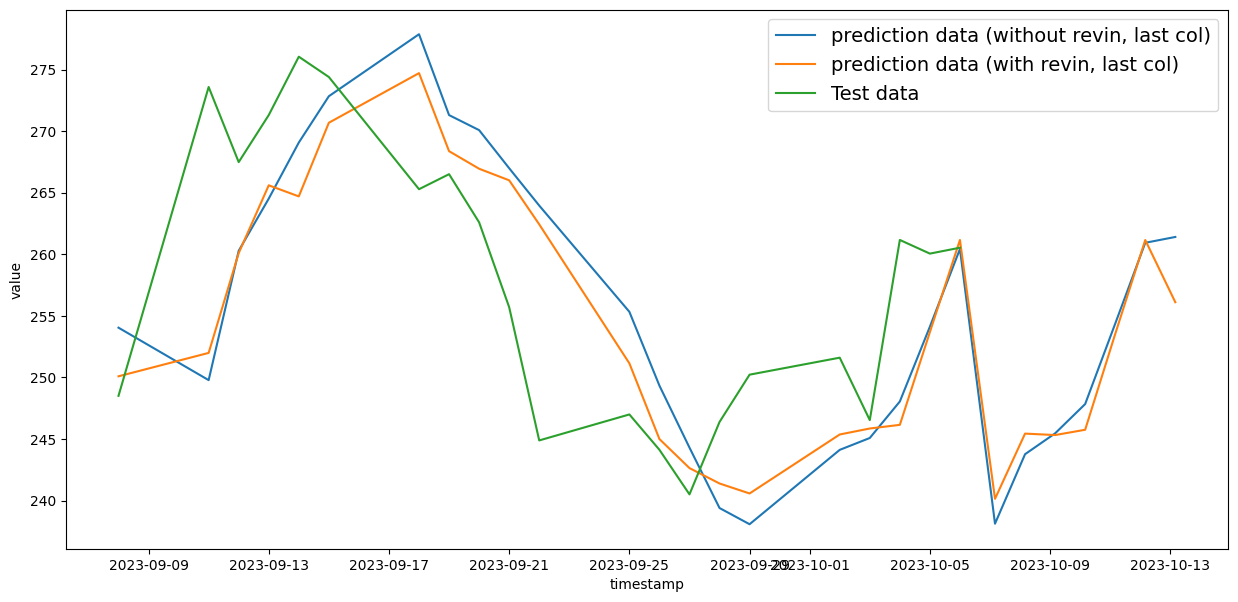

In [ ]:
plt.figure(figsize=(15, 7))
import pandas as pd

new_dates = pd.date_range(start="2023-10-07", periods=7, freq="1D")
new_dates = new_dates.tz_localize('US/Eastern')
new_df = pd.DataFrame(index=new_dates, columns=X_test2.columns)
new_df[:] = pd.NA
extended_X_test2 = pd.concat([X_test2, new_df])

new_dates_y = pd.date_range(start="2023-10-07", periods=7, freq="1D")
new_dates_y = new_dates_y.tz_localize('US/Eastern')
null_data = pd.Series(data=[None]*7, index=new_dates_y)

concatenated_tensor_wo_revin = tf.concat([model_wo_revin_preds_firstcol[:-1], model_wo_revin_preds_lastcol_seven], axis=0)
concatenated_tensor_w_revin = tf.concat([model_w_revin_preds_firstcol[:-1], model_w_revin_preds_lastcol_seven], axis=0)
y_test2_extended = pd.concat([y_test2, null_data])

plt.plot(extended_X_test2.index, concatenated_tensor_wo_revin, label="prediction data (without revin)")
plt.plot(extended_X_test2.index, concatenated_tensor_w_revin, label="prediction data (with revin)")
plt.plot(extended_X_test2.index, y_test2_extended , label="Test data")
plt.xlabel("timestamp")
plt.ylabel("value")
plt.legend(fontsize=14)
plt.show()

Plot prediction results for future timestamp

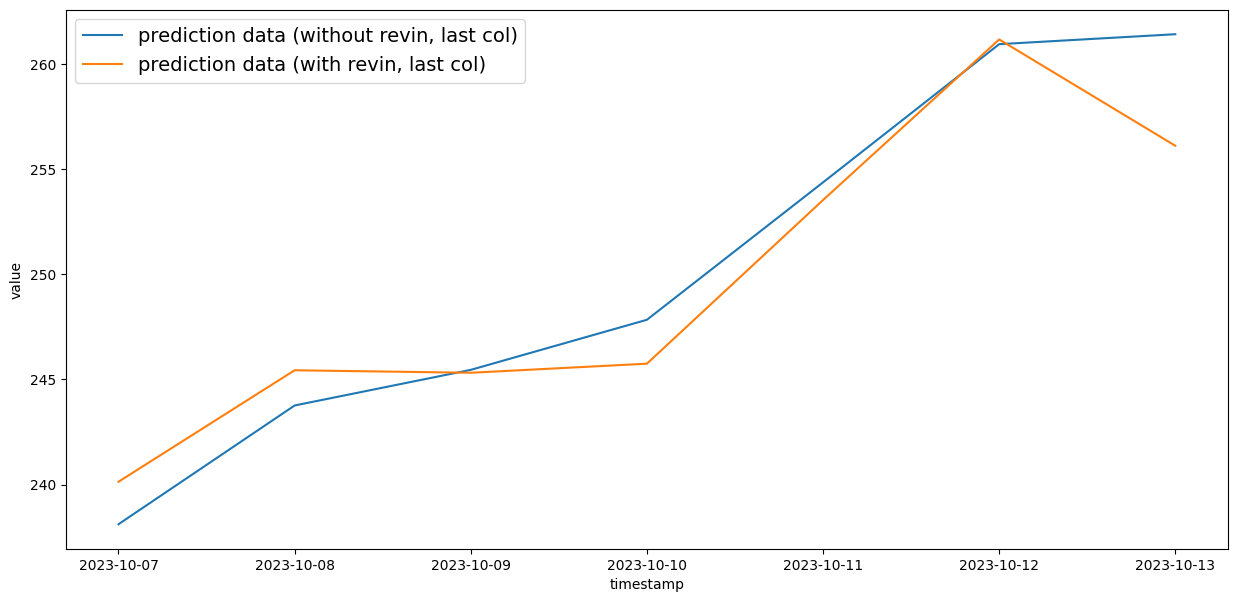

In [ ]:
plt.figure(figsize=(15, 7))
new_date_range = pd.date_range(start="2023-10-07", periods=7, freq="1D")
plt.plot(new_date_range, model_wo_revin_preds_lastcol_seven, label="prediction data (without revin)")
plt.plot(new_date_range, model_w_revin_preds_lastcol_seven, label="prediction data (with revin)")

plt.xlabel("timestamp")
plt.ylabel("value")
plt.legend(fontsize=14)
plt.show()